# non linear SVM

In [8]:
# library
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# plot
def plot_predictions(model, axes=[-1.5, 2.5, -1, 1.5]):
  x1s = np.linspace(axes[0], axes[1], 1000)
  x2s = np.linspace(axes[2], axes[3], 1000)
  x1, x2 = np.meshgrid(x1s, x2s)

  x_new = np.c_[x1.ravel(), x2.ravel()]

  y_pred = model.predict(x_new).reshape(x1.shape)
  plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2)

  y_decision = model.decision_function(x_new).reshape(x1.shape)
  plt.contour(x1, x2, y_decision, colors="k", levels=[-1, 0, 1], linestyles=["--", "-", "--"], alpha=0.8)

  plt.plot(x[y == 0, 0], x[y == 0, 1], "bo", label="$y=0$")
  plt.plot(x[y == 1, 0], x[y == 1, 1], "r^", label="$y=1$")
  plt.legend()

  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14)

In [9]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.15, random_state=1)

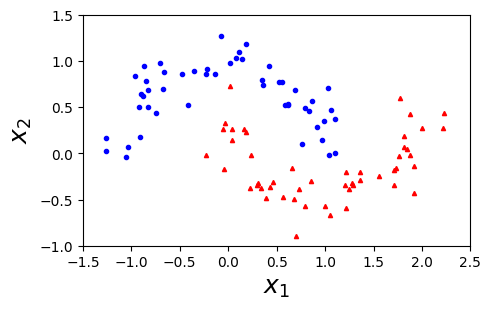

In [11]:
plt.figure(figsize=(5, 3))
plt.plot(x[y == 0, 0], x[y == 0, 1], 'ob', markersize=3)
plt.plot(x[y == 1, 0], x[y == 1, 1], 'r^', markersize=3)

plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
plt.axis([-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Features 多項式特徵

### 1. LinearSVC()

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

In [13]:
poly_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(max_iter=10000, C=10, loss='hinge', random_state=1))
])

poly_svm_clf.fit(x, y)
poly_svm_clf['svm_clf'].intercept_, poly_svm_clf['svm_clf'].coef_

/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array([-0.03153186]),
 array([[-2.25249606, -2.09821249, -3.60711099,  0.06669574,  0.24982146,
          6.2377727 , -0.96763359,  2.00076335, -0.93935332]]))

In [17]:
poly_svm_clf['poly_features'].get_feature_names_out(['x1', 'x2'])

array(['x1', 'x2', 'x1^2', 'x1 x2', 'x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2',
       'x2^3'], dtype=object)

In [18]:
poly_svm_clf.score(x, y)

0.99

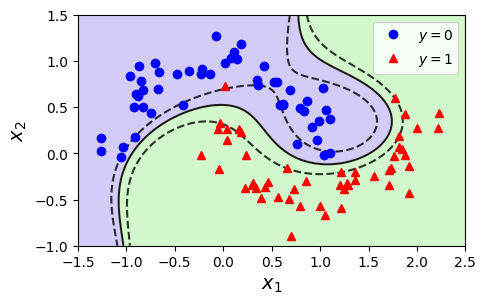

In [20]:
plt.figure(figsize=(5, 3))
plot_predictions(poly_svm_clf)
plt.show()

### 2. SGDClassifier(loss='hinge')

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, random_state=1))
])

sgd_clf.fit(x, y)
sgd_clf['sgd'].intercept_, sgd_clf['sgd'].coef_

(array([0.44326694]),
 array([[-2.63679028, -2.95315671, -5.40210818, -1.01936287,  0.21208227,
          9.10964191, -0.31194776,  2.33736493, -1.08086096]]))

In [23]:
sgd_clf.score(x, y)

0.99

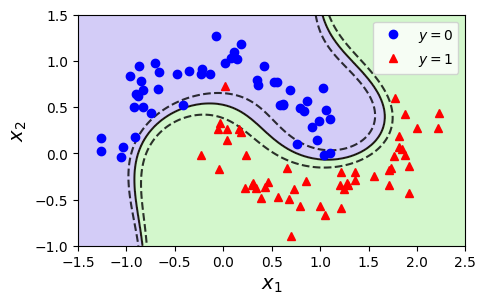

In [24]:
plt.figure(figsize=(5, 3))
plot_predictions(sgd_clf)
plt.show()

### 3. SVC(kernel='poly')

In [25]:
from sklearn.svm import SVC

poly_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_svc', SVC(kernel='poly', degree=3, coef0=1, C=10, random_state=1))
])

poly_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svc',
                 SVC(C=10, coef0=1, kernel='poly', random_state=1))])

In [26]:
poly_clf.score(x, y)

0.99

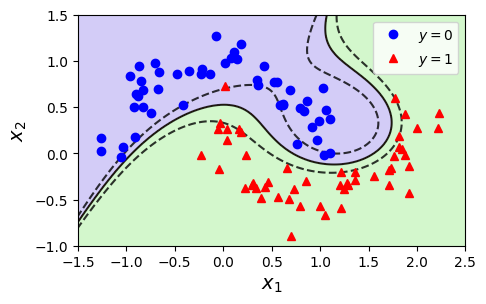

In [27]:
plt.figure(figsize=(5, 3))
plot_predictions(poly_clf)
plt.show()

## Similarity Features 相似度特徵

### 1. SVC(kernel='rbf')

In [28]:
from sklearn.svm import SVC

rbf_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', SVC(kernel='rbf', gamma=5, C=10, random_state=1))
])

rbf_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=10, gamma=5, random_state=1))])

In [29]:
rbf_clf.score(x, y)

1.0

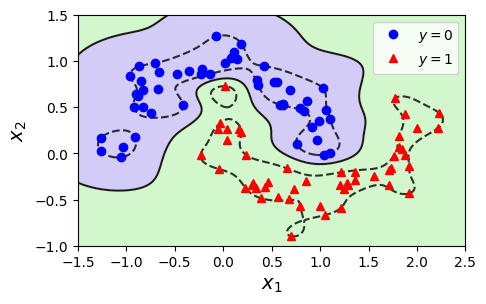

In [30]:
plt.figure(figsize=(5, 3))
plot_predictions(rbf_clf)
plt.show()